# View Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : November 15th 2016


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [8]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [7]:
rootpath_rawimage="../../CTIOData2016/August2016/Trim_HD205905"
object_name='HD205905'

In [9]:
filelist_all=os.listdir(rootpath_rawimage) 

In [47]:
indexes_files= []
filelist_fitsimages= []
for filename in filelist_all:
    if re.search('^trim_fileno.*fits$',filename):  #example of filename filter
        str_number=re.findall('^trim_fileno([0-9]+).fits$',filename)
        number=int(float(str_number[0]))
        filelist_fitsimages.append(filename)
        indexes_files.append(number)

In [48]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [50]:
sorted_files= [filelist_fitsimages[index] for index in sorted_indexes] # sort files

In [65]:
sorted_numbers= [indexes_files[index] for index in sorted_indexes]

In [52]:
sorted_filenames=[]
for file in sorted_files:
    fullfilename=os.path.join(rootpath_rawimage,file)
    indexes_files.append(number)
    sorted_filenames.append(fullfilename)

In [71]:
sorted_numbers[0]

16

In [76]:
all_dates = []
all_airmass = []
all_images = []
all_titles = []
for idx,file in np.ndenumerate(sorted_filenames):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = header['AIRMASS']
    num=sorted_numbers[idx[0]]
    title=object_name+" z= {:3.2f} Nb={}".format(float(airmass),num)
    image=hdu_list[0].data
    all_dates.append(date_obs)
    all_airmass.append(float(airmass))
    all_images.append(image)
    all_titles.append(title)
    hdu_list.close()
    

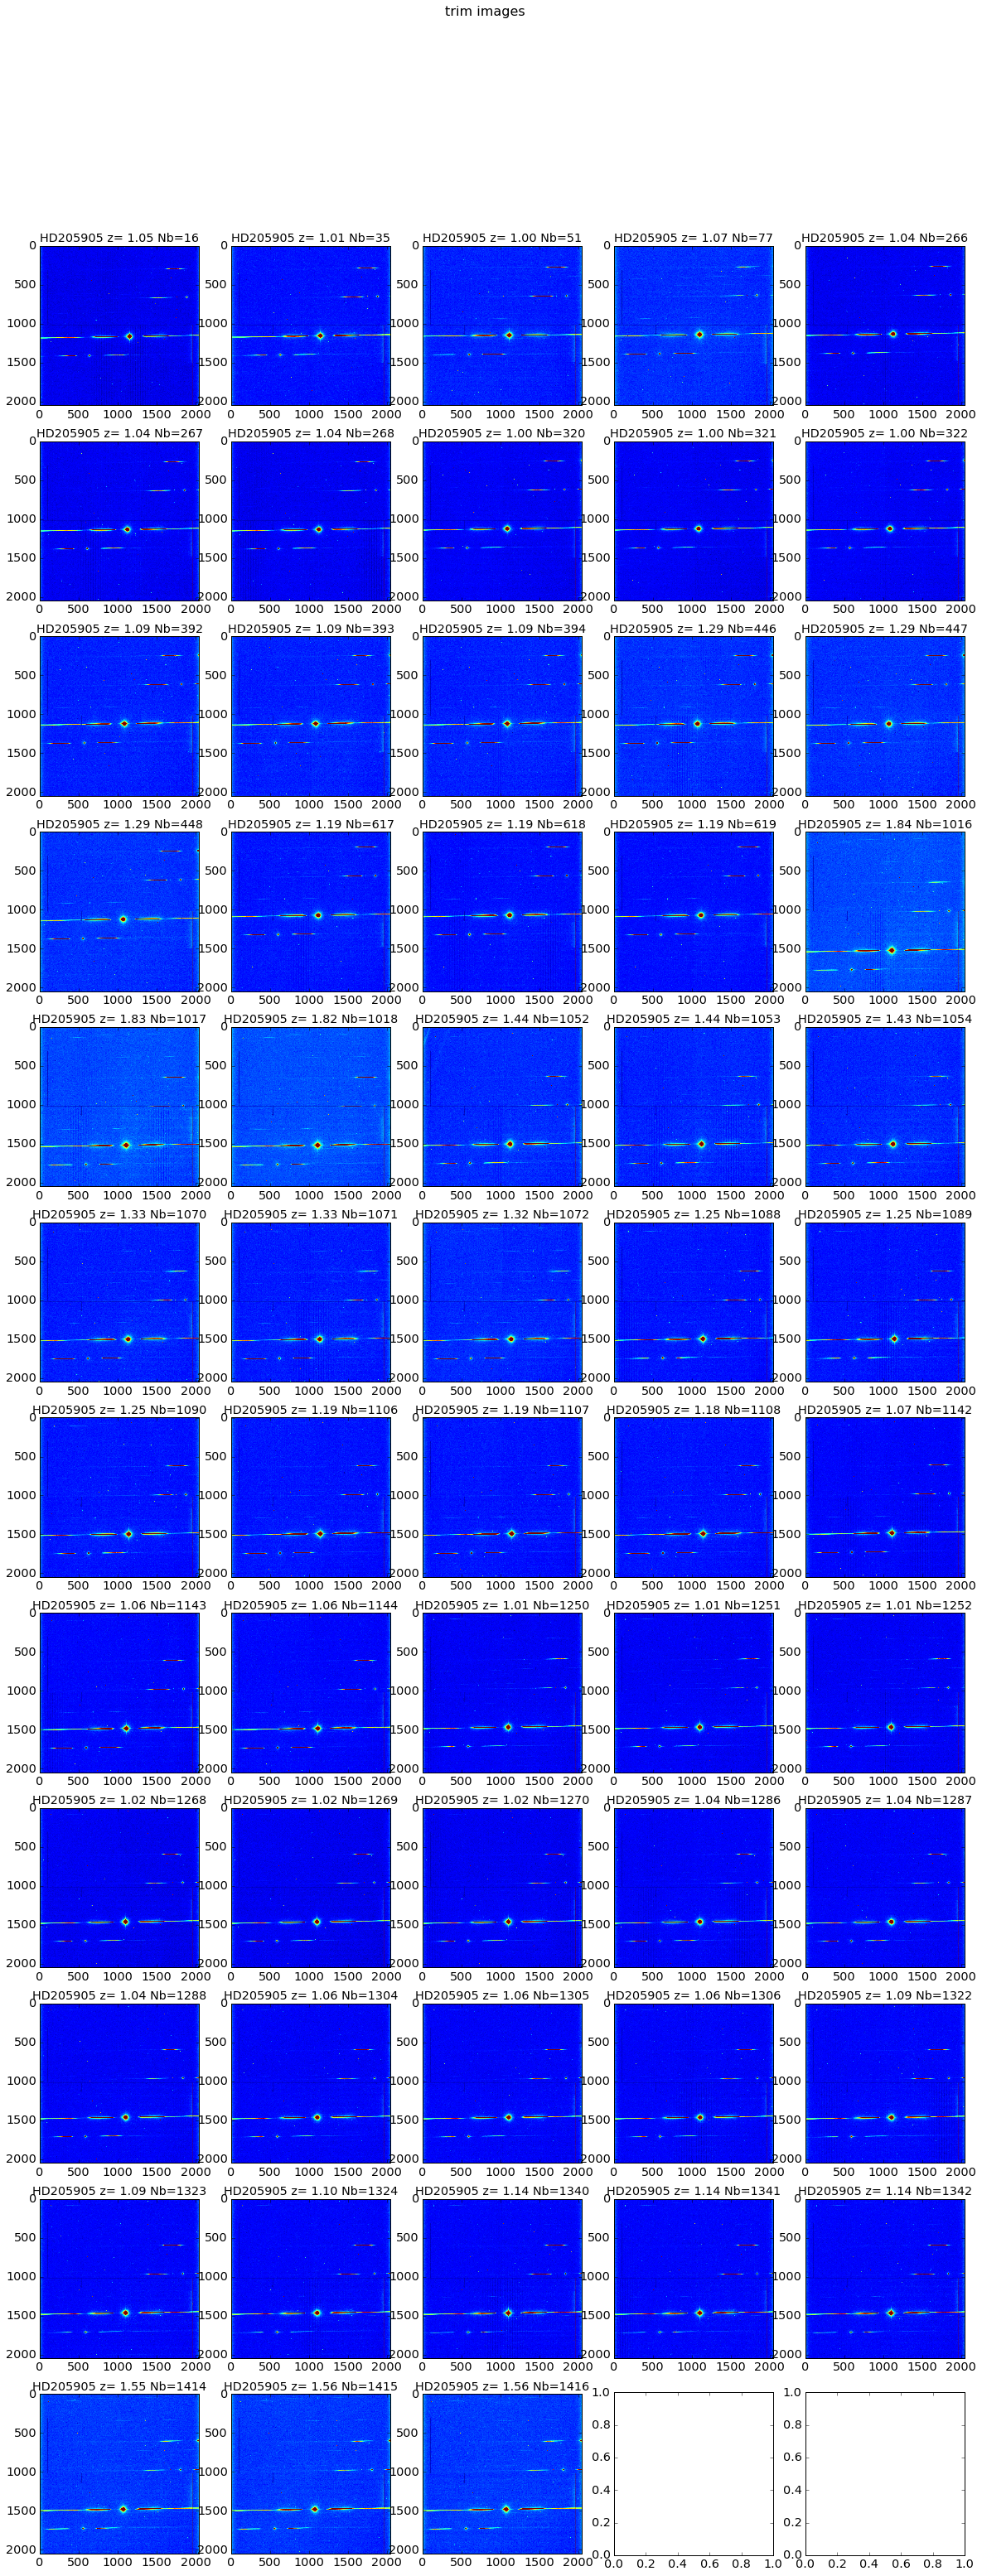

In [84]:
NBIMAGES=len(all_images)
f, axarr = plt.subplots(12,5,figsize=(20,50))
for index in np.arange(0,NBIMAGES):
    ix=index%5
    iy=index/5
    im=axarr[iy,ix].imshow(all_images[index],vmin=-10,vmax=300)
    axarr[iy,ix].set_title(all_titles[index])
title='trim images '
plt.suptitle(title,size=16)        

In [86]:
all_images[0].shape

(2048, 2048)